# Restaurant guide information for sightseers

### The project is find restaurant information for foreign sightseers on National Chi Nan University around, the information will help to the school side make restaurant guide information for sightseers.The school side hope than more public and foreign sightseers visit campus , but campus have not enough restaurant, sightseers must to go to Pu Li town look for restaurant, The school side want to make restaurant guide information for foreign sightseers and want to know restaurant style, address, telephone number on school around,

## Import packeg 

In [20]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.19.0                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Folium installed
Libraries imported.


In [56]:
CLIENT_ID = '4KMMPYQZ2CYJICDNGFIINARE5EXQTPIE0FNUOENVZGN0FHBK' 
CLIENT_SECRET = 'X3VE1TJPXKMRGVP2NZ21S1P3F1KIKX25PVXIKVVWU0EK4ZFQ' 
VERSION = '20190330'
LIMIT = 50

## Find coordinate of national chi nan university

In [57]:
address = 'national chi nan university , taiwan'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


23.9513995 120.929816068282


## Set restaurant style and range of radius

In [58]:
taiwan_query = 'taiwan'
tea_query = 'tea'
radius = 10000

## Link URL

In [59]:
taiwan_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, taiwan_query, radius, LIMIT)
tea_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, tea_query, radius, LIMIT)

## Take database form Foursquare

In [60]:
taiwan_results = requests.get(taiwan_url).json()
tea_results = requests.get(tea_url).json()

## Get Taiwanese cuisine restaurant information

In [61]:
taiwan_venues = taiwan_results['response']['venues']
taiwan_dataframe = json_normalize(taiwan_venues)
print(taiwan_dataframe['name'].head(20))
taiwan_dataframe.head(20)

taiwan_filtered_columns = ['name', 'categories'] + [col for col in taiwan_dataframe.columns if col.startswith('location.')] + ['id']
taiwan_dataframe_filtered = taiwan_dataframe.loc[:, taiwan_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
taiwan_dataframe_filtered['categories'] = taiwan_dataframe_filtered.apply(get_category_type, axis=1) 

taiwan_dataframe_filtered.columns = [column.split('.')[-1] for column in taiwan_dataframe_filtered.columns]

print(taiwan_dataframe_filtered['name'].head(20))
taiwan_dataframe_filtered.head()

0         碧廬茶會館 Bih Lu Taiwan Organic Tea Co.
1                         Taiwan Next 南投縣競選總部
2                    Taiwan Adventist College
3      台灣銀行 埔里分行 | Bank of Taiwan Puli Branch
4                        Taiwan Times Village
5                          臺灣內地 Taiwan Inland
6                 Geographic Center Of Taiwan
7                      Fly Taiwan Paragliding
8               日月潭台灣真美會館 Taiwan Beauty Hotel
9          OTOP - one town one product Taiwan
10    The Wen Wan Resort Sun Moon Lake (日月行館)
Name: name, dtype: object
0         碧廬茶會館 Bih Lu Taiwan Organic Tea Co.
1                         Taiwan Next 南投縣競選總部
2                    Taiwan Adventist College
3      台灣銀行 埔里分行 | Bank of Taiwan Puli Branch
4                        Taiwan Times Village
5                          臺灣內地 Taiwan Inland
6                 Geographic Center Of Taiwan
7                      Fly Taiwan Paragliding
8               日月潭台灣真美會館 Taiwan Beauty Hotel
9          OTOP - one town one product Taiwan
10    Th

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,碧廬茶會館 Bih Lu Taiwan Organic Tea Co.,Tea Room,埔里鎮樹人路38號,TW,Buli,臺灣,"Shuren Rd.,",5793,"[埔里鎮樹人路38號 (Shuren Rd.,), Puli, 南投縣 54547, 臺灣]","[{'lat': 23.98726018496621, 'lng': 120.9710928...",23.987260,120.971093,54547,南投縣,51bfb153498ec937254e1482
1,Taiwan Next 南投縣競選總部,General Entertainment,NaN,TW,NaN,臺灣,NaN,4099,[臺灣],"[{'lat': 23.961219787597656, 'lng': 120.968658...",23.961220,120.968658,NaN,NaN,4ee46a9461aff5a341c7100d
2,Taiwan Adventist College,General College & University,NaN,TW,NaN,臺灣,NaN,4999,[臺灣],"[{'lat': 23.90694723113378, 'lng': 120.9368084...",23.906947,120.936808,NaN,NaN,549c00c9498e8a88a04f1c1d
3,台灣銀行 埔里分行 | Bank of Taiwan Puli Branch,Bank,埔里鎮東榮路112號,TW,NaN,臺灣,近第三市場,4081,"[埔里鎮東榮路112號 (近第三市場), 臺灣]","[{'lat': 23.963756561279297, 'lng': 120.967590...",23.963757,120.967590,NaN,NaN,54f12eaf498e2fcc7d8dbbcf
4,Taiwan Times Village,None,NaN,TW,NaN,臺灣,NaN,9531,[臺灣],"[{'lat': 23.882144, 'lng': 120.8747392, 'label...",23.882144,120.874739,NaN,NaN,535773b7498ef1c6c69152fe


## Get Taiwan tea restaurant information

In [62]:
tea_venues = tea_results['response']['venues']
tea_dataframe = json_normalize(tea_venues)
print(tea_dataframe['name'].head(20))
tea_dataframe.head(20)

tea_filtered_columns = ['name', 'categories'] + [col for col in tea_dataframe.columns if col.startswith('location.')] + ['id']
tea_dataframe_filtered = tea_dataframe.loc[:, tea_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
tea_dataframe_filtered['categories'] = tea_dataframe_filtered.apply(get_category_type, axis=1) 

tea_dataframe_filtered.columns = [column.split('.')[-1] for column in tea_dataframe_filtered.columns]

print(tea_dataframe_filtered['name'].head(20))
tea_dataframe_filtered.head()

0                 日月老茶廠 ANTIQUE ASSAM TEA FARM
1          碧廬茶會館 Bih Lu Taiwan Organic Tea Co.
2                          TenRen's Tea (天仁茗茶)
3                                    Tea House
4                                    who's tea
5                                    whi's tea
6                   Tea House (The Lalu Hotel)
7                                    Tea Fresh
8                            Moon Tea & Coffee
9                                Ten Ren's Tea
10    Sun Moon Lake Teachers' Hostel (日月潭教師會館)
Name: name, dtype: object
0                 日月老茶廠 ANTIQUE ASSAM TEA FARM
1          碧廬茶會館 Bih Lu Taiwan Organic Tea Co.
2                          TenRen's Tea (天仁茗茶)
3                                    Tea House
4                                    who's tea
5                                    whi's tea
6                   Tea House (The Lalu Hotel)
7                                    Tea Fresh
8                            Moon Tea & Coffee
9                                T

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,日月老茶廠 ANTIQUE ASSAM TEA FARM,Historic Site,南投縣魚池鄉中明村有水巷38號,TW,南投縣,臺灣,NaN,6642,"[南投縣魚池鄉中明村有水巷38號, 南投縣, 南投縣 555, 臺灣]","[{'lat': 23.89206293925846, 'lng': 120.9229400...",23.892063,120.922940,555,南投縣,4e9a9aaa5503cfce744d27c5
1,碧廬茶會館 Bih Lu Taiwan Organic Tea Co.,Tea Room,埔里鎮樹人路38號,TW,Buli,臺灣,"Shuren Rd.,",5793,"[埔里鎮樹人路38號 (Shuren Rd.,), Puli, 南投縣 54547, 臺灣]","[{'lat': 23.98726018496621, 'lng': 120.9710928...",23.987260,120.971093,54547,南投縣,51bfb153498ec937254e1482
2,TenRen's Tea (天仁茗茶),Tea Room,NaN,TW,南投,臺灣,NaN,9754,"[南投, 南投縣, 臺灣]","[{'lat': 23.865255584316643, 'lng': 120.912267...",23.865256,120.912267,NaN,南投縣,4f3f6709e4b0a5f251c68669
3,Tea House,None,"No. 20-19, XīnShēng Rd, Puli Township",TW,Puli Township,臺灣,NaN,5775,"[No. 20-19, XīnShēng Rd, Puli Township, Puli T...","[{'lat': 23.899601847371418, 'lng': 120.933132...",23.899602,120.933132,545,NaN,4bb8084f3db7b713ccf3209a
4,who's tea,Food & Drink Shop,NaN,TW,NaN,臺灣,NaN,4454,[臺灣],"[{'lat': 23.958308, 'lng': 120.97295, 'label':...",23.958308,120.972950,NaN,NaN,5843baf7561ded102472fb08


## Build map center on National Chi Nan University(green point)

In [63]:
taiwan_query = 'taiwan'
tea_query = 'tea'

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around rangsit university

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='green',
    popup='pu li',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(venues_map)


for lat, lng, label in zip(taiwan_dataframe_filtered.lat, taiwan_dataframe_filtered.lng, taiwan_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)
    

    

for lat, lng, label in zip(tea_dataframe_filtered.lat, tea_dataframe_filtered.lng, tea_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    



venues_map

## manipulate data

In [64]:
taiwan_dataframe_filtered['type'] = 'taiwan'
tea_dataframe_filtered['type'] = 'tea'


AllRes = pd.DataFrame()
AllRes = pd.concat([taiwan_dataframe_filtered,tea_dataframe_filtered])
AllResList = AllRes[['name','distance', 'type','id']]

## Count quantity of restaurant

In [65]:
AllResList.groupby('type').count()

,name,distance,id
type,,,
taiwan,11,11,11
tea,11,11,11


In [66]:
import matplotlib.pyplot as plt
AllResList.groupby('type')['name'].count().plot(kind = 'bar')

plt.title('quantity of Restaurants Near ')
plt.xlabel('Restaurant style')
plt.show()

## The quantity of restaurants is too little, and I can't find any chinese restaurants mark in english, they marked in chinese, so the database have no data. 

## Restaurant dictance

In [67]:
avgDis = AllResList.groupby('type')['distance'].mean()
avgDis

type
taiwan    6892.545455
tea       7858.909091
Name: distance, dtype: float64

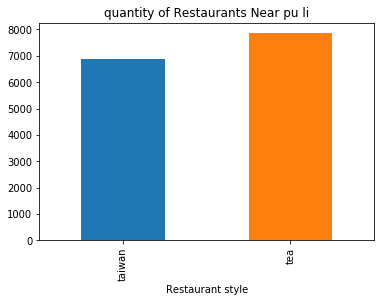

In [68]:
avgDis.plot(kind = 'Bar')

plt.title('quantity of Restaurants Near pu li')
plt.xlabel('Restaurant style')
plt.show()

## Even i find Taiwanese cuisine restaurant and Taiwan tea restaurant, the quantity still little and dictance too far, it is not good phenomenon, the means these restaurants didn't do promote, if The school side want to make restaurant guide information for foreign sightseers, obviously the school side must collect more restaurant information from different source of information.